In [0]:
#import packages
import numpy as np
import pandas as pd
import nltk as nltk
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#load the dsataset
df=pd.read_csv('job_postings.csv')

In [0]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [0]:
#check the null values
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [0]:
#shape of the dataset
df.shape

(17880, 18)

In [0]:
#dropping features as they are too many mising values
df.drop(columns=['location','department','salary_range','required_experience','required_education','industry'],axis=1,inplace=True)

In [0]:
# Replace missing values of these featues with no information
df['requirements'].fillna("Noinformation", inplace = True)
df['benefits'].fillna("Noinformation", inplace = True) 
df['company_profile'].fillna("Noinformation", inplace = True)

In [0]:
#check the unique values of function column
df['function'].unique()

array(['Marketing', 'Customer Service', nan, 'Sales',
       'Health Care Provider', 'Management', 'Information Technology',
       'Other', 'Engineering', 'Administrative', 'Design', 'Production',
       'Education', 'Supply Chain', 'Business Development',
       'Product Management', 'Financial Analyst', 'Consulting',
       'Human Resources', 'Project Management', 'Manufacturing',
       'Public Relations', 'Strategy/Planning', 'Advertising', 'Finance',
       'General Business', 'Research', 'Accounting/Auditing',
       'Art/Creative', 'Quality Assurance', 'Data Analyst',
       'Business Analyst', 'Writing/Editing', 'Distribution', 'Science',
       'Training', 'Purchasing', 'Legal'], dtype=object)

In [0]:
#categorize the 37 unique values into 5 categories
df['function'].replace(dict.fromkeys(['Marketing','Finance','Advertising','Accounting/Auditing','Writing/Editing','Legal'], 'Marketing and Finance'),inplace=True)
df['function'].replace(dict.fromkeys(['Customer Service','Consulting','Health Care Provider','Art/Creative','Science','Training','Education','Research'],'Other'),inplace=True)
df['function'].replace(dict.fromkeys(['Production','Supply Chain','Design','Manufacturing','Quality Assurance','Distribution','Purchasing'],'Sales'),inplace=True)
df['function'].replace(dict.fromkeys(['Administrative','Business Development','Project Management','Human Resources','Public Relations','Strategy/Planning','General Business','Product Management'],'Management'),inplace=True)
df['function'].replace(dict.fromkeys(['Information Technology','Engineering','Data Analyst','Business Analyst','Financial Analyst'],'Information Technology'),inplace=True)




In [0]:
#now again check unique values
df['function'].unique()

array(['Marketing and Finance', 'Other', nan, 'Sales', 'Management',
       'Information Technology'], dtype=object)

In [0]:
#Replace the missing values of these columns with mode
for column in ['employment_type','function']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [0]:
#all missing data is now replcaed with mode
df['function'].unique()

array(['Marketing and Finance', 'Other', 'Information Technology',
       'Sales', 'Management'], dtype=object)

In [0]:
# Drop the one record with description having missing data
df.dropna(axis=0,subset=['description'], inplace=True)

In [0]:
df.isna().sum()

job_id              0
title               0
company_profile     0
description         0
requirements        0
benefits            0
telecommuting       0
has_company_logo    0
has_questions       0
employment_type     0
function            0
fraudulent          0
dtype: int64

In [0]:
# Now check the shape of the dataframe after cleaning the data
df.shape

(17879, 12)

In [0]:
df.head()

,job_id,title,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,function,fraudulent
0,1,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Noinformation,0,1,0,Other,Marketing and Finance,0
1,2,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Other,0
2,3,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Noinformation,0,1,0,Full-time,Information Technology,0
3,4,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Sales,0
4,5,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Other,0


In [0]:
#Compare the target variable class
!pip install plotly

In [0]:
#Plot the target variable against count
import plotly.express as px
count = df["fraudulent"].value_counts()
fig = px.bar(df, x= count.index,y=count)
fig.update_layout(
    title="Count of target variable",
    xaxis_title="Count",
    yaxis_title="Target Class"
)
fig.show()

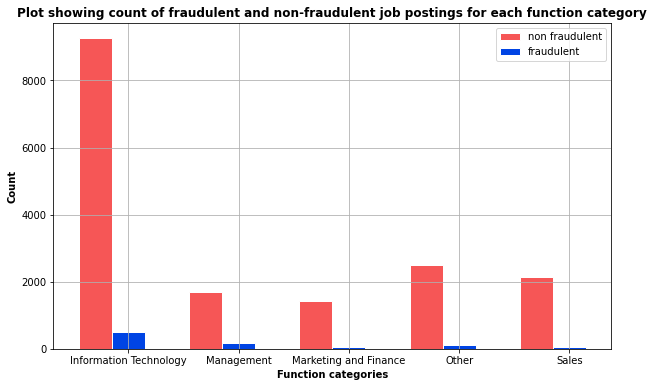

In [0]:
#plot for showing count of fraudulent and non-fraudulent job postings for each function
#df.groupby(["function","fraudulent"])["job_id"].count()
Width = 0.30
nonf = [9259,1707, 1424, 2489, 2135]
f = [491,160, 59, 106,49 ]
g1 = np.arange(len(nonf))
g2 = [i + Width for i in g1]

plt.figure(figsize=(10,6))

plt.bar(g1, nonf, color='#F65656', width=Width, edgecolor='white', label='non fraudulent')
plt.bar(g2, f, color='#0044E4', width=Width, edgecolor='white', label='fraudulent')

plt.title('Plot showing count of fraudulent and non-fraudulent job postings for each function category',fontweight='bold')
plt.xlabel('Function categories', fontweight='bold')
plt.xticks([r + Width for r in range(len(nonf))], ['Information Technology', 'Management', 'Marketing and Finance', 'Other', 'Sales'])
plt.ylabel('Count', fontweight='bold')

plt.legend()
plt.grid()
plt.show()




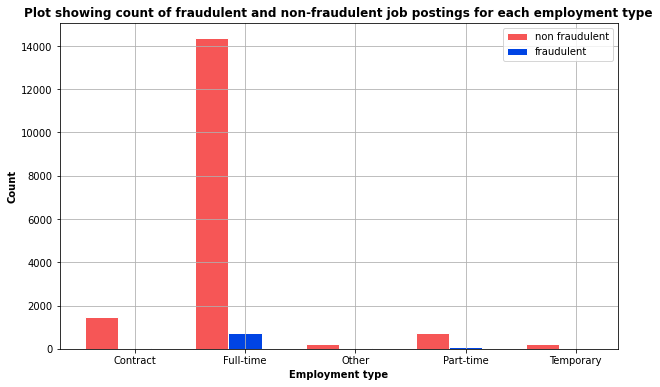

In [0]:
#plot for showing count of fraudulent and non-fraudulent job postings for each employment type
#df.groupby(["employment_type","fraudulent"])["job_id"].count()

Width = 0.30
non_f = [1480,14360, 212, 723, 239]
f_1 = [44,730, 15, 74,2 ]
b1 = np.arange(len(non_f))
b2 = [i + Width for i in b1]

plt.figure(figsize=(10,6))

plt.bar(b1, non_f, color='#F65656', width=Width, edgecolor='white', label='non fraudulent')
plt.bar(b2, f_1, color='#0044E4', width=Width, edgecolor='white', label='fraudulent')

plt.title('Plot showing count of fraudulent and non-fraudulent job postings for each employment type',fontweight='bold')
plt.xlabel('Employment type', fontweight='bold')
plt.xticks([r + Width for r in range(len(non_f))], ['Contract', 'Full-time', 'Other', 'Part-time', 'Temporary'])
plt.ylabel('Count', fontweight='bold')

plt.legend()
plt.grid()
plt.show()

In [0]:
# Combine the description and requirements of job to one column called job_text
df['job_text'] = df['description'].str.cat(df['requirements'], sep =" ")

In [0]:
#import all packages for text preprocessing
import re
!pip install langdetect
from langdetect import detect
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
!pip install emoji
import emoji
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


     |████████████████████████████████| 983kB 3.4MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=3b115e76d381e9b7ec0141f300990dae2a174a906a68b6542545006118b86876
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect
     |████████████████████████████████| 51kB 2.0MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=b6dd8803b118b56b4c92b373b108291afe99e3c97a3ee86da861cd7c8b0a9d19
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


In [0]:
# Function of remove the emojis
def check_emoji(a):
    i=0
    vector=''
    array=[]
    for char in a:
        if char in emoji.UNICODE_EMOJI:
             array.append(char)
        else:
            vector= vector + a[i]
        i=i+1
    return vector
  
#function to tokenize the data, remove special characters and convefrt text to lower case
def convert_token(a):
    txt=check_emoji(a)
    token = RegexpTokenizer('\w+|\!')
    toks=token.tokenize(txt.lower())
    return toks

#Function to do stemming using PorterStemmer() 
def token_stemming(df):
    token_stemmed=[]
    sent=df['job_text']
    toks = convert_token(sent)
    stem = []
    s=PorterStemmer()
    for t in toks:
        stem.append(s.stem(t))
        token_stemmed.append(s.stem(t))
        ret=' '.join(stem)
    return(ret)

In [0]:
#send the job_text data for text preprocessing
df['job_text']=df[["job_text"]].apply(token_stemming,axis=1)

In [0]:
#create a new dataframe with processed text data and target variable
frame = { 'job_text': df['job_text'], 'fraudulent': df['fraudulent']}
des_req = pd.DataFrame(frame)
des_req.head(5)

,job_text,fraudulent
0,food52 a fast grow jame beard award win onlin ...,0
1,organis focus vibrant awesom ! do you have a p...,0
2,our client locat in houston is activ seek an e...,0
3,the compani esri environment system research i...,0
4,job titl item review managerloc fort worth tx ...,0


In [0]:
# Copy this dataframe to a new csv file called job_text
#This csv will be used for TF-IDF vectorization later
des_req.to_csv('job_text.csv')

In [0]:
#Now combine all the text data features into one column called job_data
job_data=df[['title','company_profile','description','requirements','benefits']].agg(' '.join, axis=1)
df['job_data']=job_data

In [0]:
# Function to remove the emojis
def check_emoji(a):
    i=0
    vector=''
    array=[]
    for char in a:
        if char in emoji.UNICODE_EMOJI:
             array.append(char)
        else:
            vector= vector + a[i]
        i=i+1
    return vector
  
#function to tokenize the data, remove special characters and convefrt text to lower case
def convert_token(a):
    txt=check_emoji(a)
    token = RegexpTokenizer('\w+|\!')
    toks=token.tokenize(txt.lower())
    return toks

#Function to do stemming using PorterStemmer() 
def token_stemming(df):
    token_stemmed=[]
    sent=df['job_data']
    toks = convert_token(sent)
    stem = []
    s=PorterStemmer()
    for t in toks:
        stem.append(s.stem(t))
        token_stemmed.append(s.stem(t))
        ret=' '.join(stem)
    return(ret)

In [0]:
#send the job_data data for text preprocessing
df['job_data']=df[["job_data"]].apply(token_stemming,axis=1)

In [0]:
#Copy this preprocessed text data and other features into a new dataframe
frame1 = { 'job_data': df['job_data'],'employment_type':df['employment_type'],'function':df['function'], 'fraudulent': df['fraudulent'],
          'telecommuting':df['telecommuting'],'has_company_logo':df['has_company_logo'],
          'has_questions':df['has_questions']
          }
all_fea = pd.DataFrame(frame1)

In [0]:
#Do one hot encoding for categorical data
a=pd.get_dummies(all_fea['employment_type'])
b=pd.get_dummies(all_fea['function'])
all_fea=pd.concat([all_fea,a,b],axis=1)
all_fea.head(5)

,job_data,employment_type,function,fraudulent,telecommuting,has_company_logo,has_questions,Contract,Full-time,Other,Part-time,Temporary,Information Technology,Management,Marketing and Finance,Other,Sales
0,market intern we re food52 and we ve creat a g...,Other,Marketing and Finance,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,custom servic cloud video product 90 second th...,Full-time,Other,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,commiss machineri assist cma valor servic prov...,Full-time,Information Technology,0,0,1,0,0,1,0,0,0,1,0,0,0,0
3,account execut washington dc our passion for i...,Full-time,Sales,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,bill review manag spotsourc solut llc is a glo...,Full-time,Other,0,0,1,1,0,1,0,0,0,0,0,0,1,0


In [0]:
#Drop the columns that were one hot encoded
all_fea.drop(['employment_type','function'],axis=1,inplace=True)
all_fea

,job_data,fraudulent,telecommuting,has_company_logo,has_questions,Contract,Full-time,Other,Part-time,Temporary,Information Technology,Management,Marketing and Finance,Other,Sales
0,market intern we re food52 and we ve creat a g...,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,custom servic cloud video product 90 second th...,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,commiss machineri assist cma valor servic prov...,0,0,1,0,0,1,0,0,0,1,0,0,0,0
3,account execut washington dc our passion for i...,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,bill review manag spotsourc solut llc is a glo...,0,0,1,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,account director distribut vend is look for so...,0,0,1,1,0,1,0,0,0,0,0,0,0,1
17876,payrol account weblinc is the e commerc platfo...,0,0,1,1,0,1,0,0,0,0,0,1,0,0
17877,project cost control staff engin cost control ...,0,0,0,0,0,1,0,0,0,1,0,0,0,0
17878,graphic design noinform nemsia studio is look ...,0,0,0,1,1,0,0,0,0,0,0,0,0,1


In [0]:
# Copy this dataframe to a new csv file called job_data
#This csv will be used for TF-IDF vectorization later
all_fea.to_csv('job_data.csv')